In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
dataset=pd.read_csv("/Users/neha/Documents/Projects for Resume/data.csv")

### Looking at the dataset

In [29]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
dataset.shape

(569, 33)

### Dropping unwanted columns

In [33]:
data=dataset.drop(['Unnamed: 32', 'id'], axis= 1)

### Check for missing and null values

In [34]:
data.isnull().sum()
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Checking the value in target dataset

B    357
M    212
Name: diagnosis, dtype: int64


/Users/neha/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


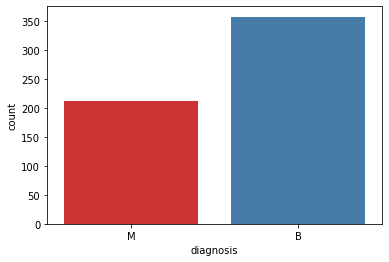

In [35]:
sns.countplot(data["diagnosis"],palette="Set1")
print(data.diagnosis.value_counts()) 

### Identifying the dependent and Independent Variable

In [40]:
X = data.iloc[:, 1:31].values
Y = data.iloc[:, 0].values

### Converting Categorical Variables to number so that the model can understand

In [46]:
le = preprocessing.LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Anaylsis

### Using Heat Map to check correlation between numeric variable

In [49]:
corr_matrix = data.corr()

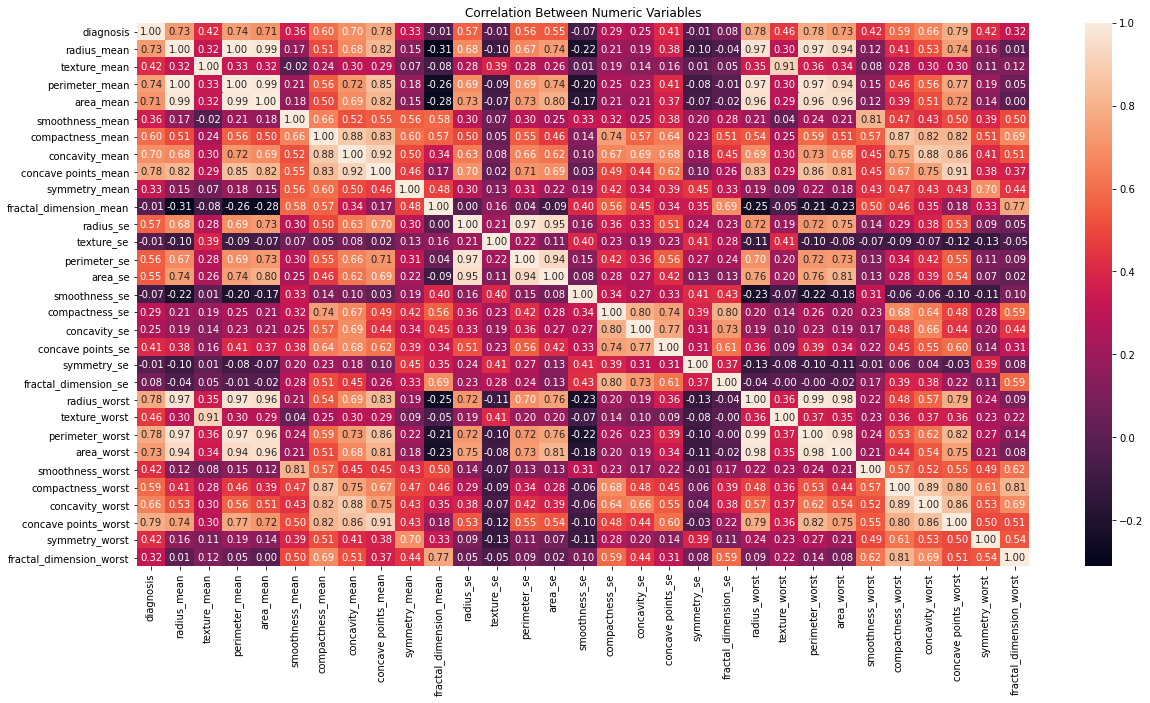

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot = True, fmt = ".2f")
plt.title("Correlation Between Numeric Variables")
plt.show()

### Declaring Dependent and Independent Variable

In [55]:
y = data.diagnosis
x = data.drop(["diagnosis"], axis = 1)

### Detecting Outlier

In [56]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


diagnosis                    1.000000
radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_

In [62]:
print(data < (Q1 - 1.5 * IQR) |(data > (Q3 + 1.5 * IQR)))

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        False        False         False           False      False   
1        False        False         False           False      False   
2        False        False         False           False      False   
3        False        False         False           False      False   
4        False        False         False           False      False   
..         ...          ...           ...             ...        ...   
564      False        False         False           False      False   
565      False        False         False           False      False   
566      False        False         False           False      False   
567      False        False         False           False      False   
568       True        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0               True              True            True  

### Splitting the dataset into the Training set and Test set

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [66]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("Y_train",len(Y_train))
print("Y_test",len(Y_test))

X_train 426
X_test 143
Y_train 426
Y_test 143


### Feature Scaling

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
#Fitting the Logistic Regression Algorithm to the Training Set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("Accuracy : ", acc)
print("CM : ", cm)

Accuracy :  0.958041958041958
CM :  [[87  3]
 [ 3 50]]


In [90]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("Accuracy : ", acc)
print("CM : ", cm)

Accuracy :  0.951048951048951
CM :  [[89  1]
 [ 6 47]]


In [92]:
#Fitting SVM
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train) 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("Accuracy : ", acc)
print("CM : ", cm)

Accuracy :  0.972027972027972
CM :  [[88  2]
 [ 2 51]]


In [93]:
#Fitting K-SVM
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("Accuracy : ", acc)
print("CM : ", cm)

Accuracy :  0.965034965034965
CM :  [[88  2]
 [ 3 50]]


In [94]:
#Fitting Naive_Bayes
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("Accuracy : ", acc)
print("CM : ", cm)

Accuracy :  0.916083916083916
CM :  [[84  6]
 [ 6 47]]


In [95]:
#Fitting Decision Tree Algorithm
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("Accuracy : ", acc)
print("CM : ", cm)

Accuracy :  0.958041958041958
CM :  [[86  4]
 [ 2 51]]


In [96]:
#Fitting Random Forest Classification Algorithm
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("Accuracy : ", acc)
print("CM : ", cm)

Accuracy :  0.986013986013986
CM :  [[89  1]
 [ 1 52]]
